In [1]:
import sys
sys.path.append('../../../../')

import VESIcal as v
import pandas as pd

In [2]:
alkbasalt = v.Sample({'SiO2': 49.0, 
                'TiO2': 1.27, 
                'Al2O3': 19.7, 
                'Fe2O3': 3.74, 
                'FeO': 5.33,
                'MnO': 0.17, 
                'MgO': 4.82, 
                'CaO': 8.85, 
                'Na2O': 4.23, 
                'K2O': 1.00, 
                'P2O5': 0.37,
                'H2O': 4.51,
                'CO2': 0.25})

rhyolite = v.Sample({'SiO2':77.19,
                 'TiO2':0.06,
                 'Al2O3':12.80,
                 'FeO':0.94,
                 'MgO':0.03,
                 'CaO':0.53,
                 'Na2O':3.98,
                 'K2O':4.65,
                 'CO2':0.05,
                 'H2O':0.26})

sample_table = pd.DataFrame([alkbasalt.get_composition(), rhyolite.get_composition()], index=["Alkali Basalt", "Rhyolite"])
sample_table

,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,CO2
Alkali Basalt,49.00,1.27,19.7,3.74,5.33,0.17,4.82,8.85,4.23,1.00,0.37,4.51,0.25
Rhyolite,77.19,0.06,12.8,NaN,0.94,NaN,0.03,0.53,3.98,4.65,NaN,0.26,0.05


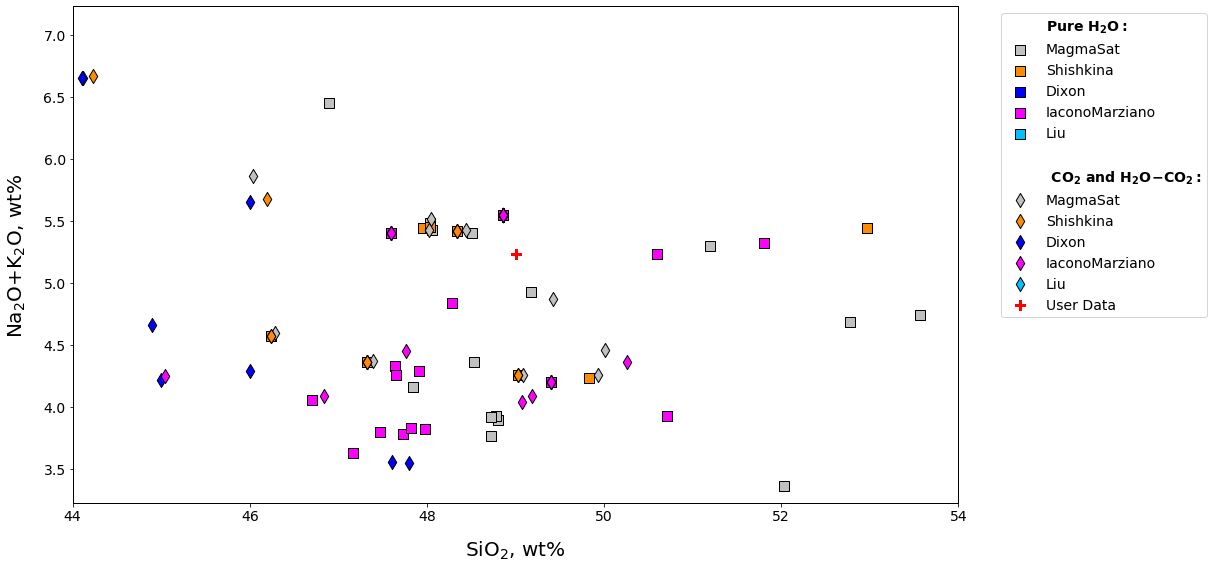

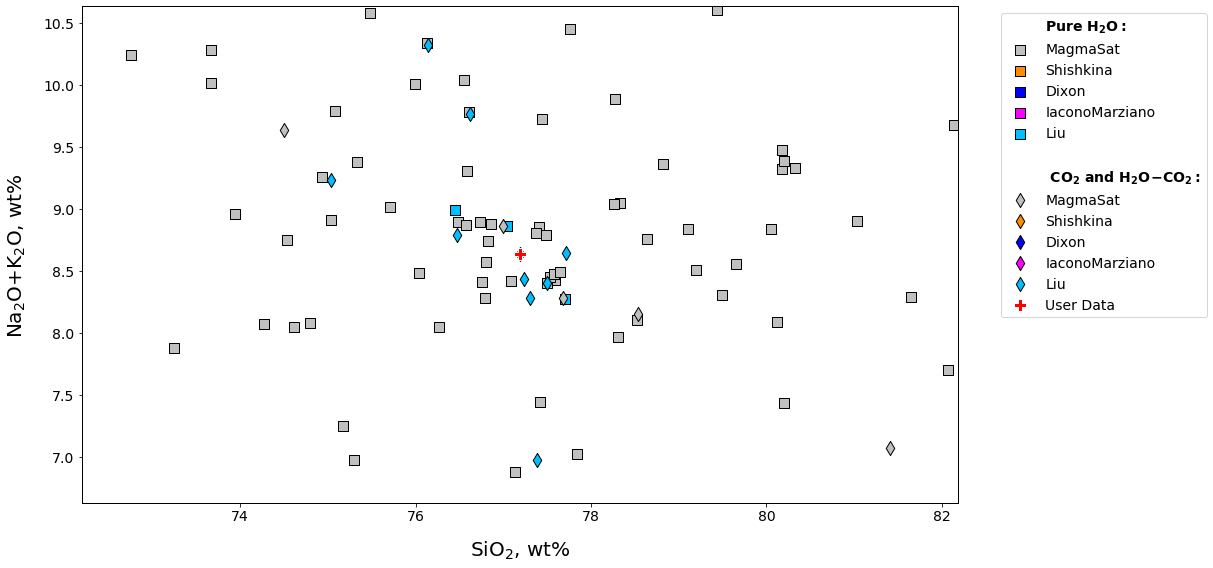

In [4]:
#check calibration
v.calib_plot(user_data=alkbasalt.get_composition(), model='mixed', zoom='user_data')
v.calib_plot(user_data=rhyolite.get_composition(), model='mixed', zoom='user_data')

In [5]:
alkbasalt_isobars, alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, temperature=1200, pressure_list=[500, 1000, 2000], isopleth_list=[0.5], print_status=True).result

rhyolite_isobars, rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=rhyolite, temperature=800, pressure_list=[500, 1000, 2000], isopleth_list=[0.5]).result


Calculating isobar at 500 bars
 done.                                                                                                                           
Calculating isobar at 1000 bars
 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Done!
Calculating isobar at 500 bars
 done.                                                                                                                           
Calculating isobar at 1000 bars
 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Done!


In [7]:
Iac_alkbasalt_isobars, Iac_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, temperature=1200, pressure_list=[500, 1000, 2000], isopleth_list=[0.5], model="IaconoMarziano").result
Dixon_alkbasalt_isobars, Dixon_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, temperature=1200, pressure_list=[500, 1000, 2000], isopleth_list=[0.5], model="Dixon").result
Shish_alkbasalt_isobars, Shish_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, temperature=1200, pressure_list=[500, 1000, 2000], isopleth_list=[0.5], model="ShishkinaIdealMixing").result

Liu_rhyolite_isobars, Liu_rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=rhyolite, temperature=800, pressure_list=[500, 1000, 2000], isopleth_list=[0.5], model="Liu").result

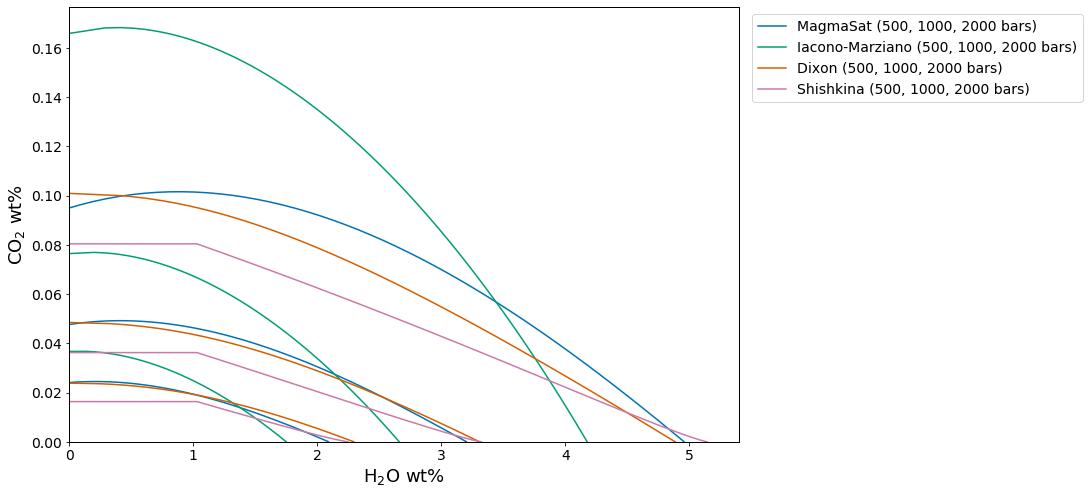

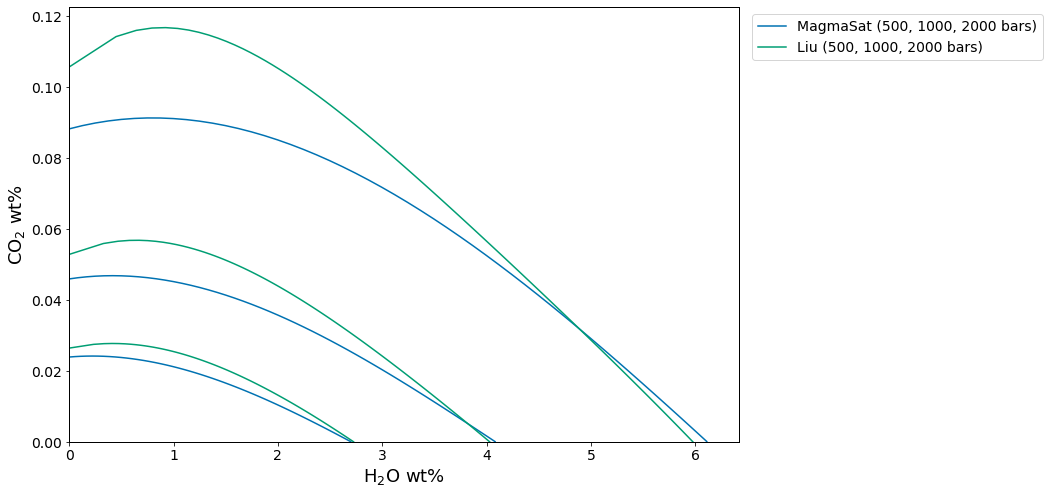

In [8]:
fig, ax = v.plot(isobars=[alkbasalt_isobars, Iac_alkbasalt_isobars, Dixon_alkbasalt_isobars, Shish_alkbasalt_isobars], isobar_labels=["MagmaSat", "Iacono-Marziano", "Dixon", "Shishkina"])
v.show()

fig, ax = v.plot(isobars=[rhyolite_isobars, Liu_rhyolite_isobars], isobar_labels=["MagmaSat", "Liu"])
v.show()

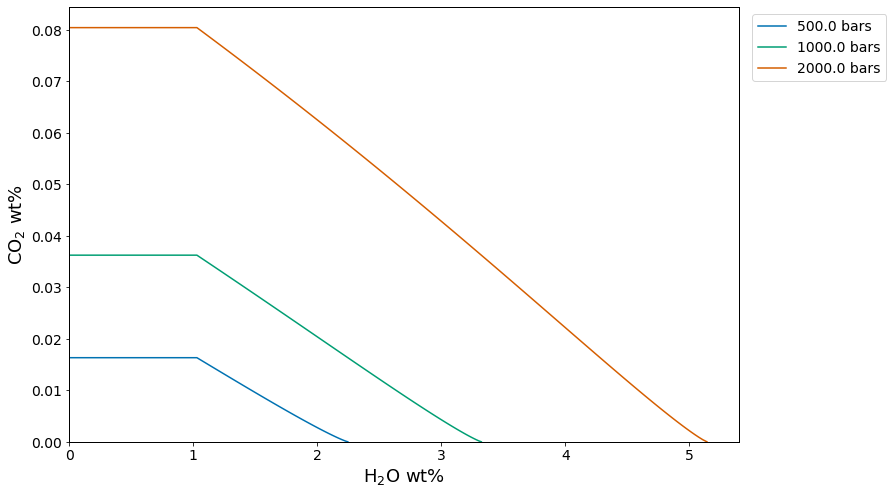

In [9]:
fig, ax = v.plot(isobars=Shish_alkbasalt_isobars)
v.show()